# Part 1: Setup & Cleaning

In [2]:
# Standard Libraries
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,  cross_validate

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier)

# Performance metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score


# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
sns.set()
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sdss1.csv', index_col='objid')
df = df.sort_index()

In [4]:
df.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,Flux_g,Flux_r,Flux_i,Flux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,...,50.35183,92.27589,130.8493,172.3348,430194949951088640,GALAXY,0.032125,382,51816,368
1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,...,65.13789,153.47130,242.6524,349.4461,466235292731336704,GALAXY,0.121315,414,51869,410
1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,...,111.15240,188.56690,247.0515,303.3817,466232818830174208,GALAXY,0.048765,414,51869,401
1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,...,339.99300,581.08730,705.6645,781.6734,1705795582662043648,STAR,-0.000098,1515,52932,208
1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,...,500.42900,971.85570,1358.5900,1801.3750,459394680333821952,GALAXY,0.040287,408,51821,100
1237645941824356481,40.272105,-0.642510,19.23401,17.53330,16.87430,16.63157,16.49762,109,301,2,...,96.97905,177.94330,222.5214,251.7367,1204744279872792576,STAR,-0.000052,1070,52591,114
1237645942898229350,40.582032,0.134770,18.64558,16.44336,15.52452,15.18185,14.98858,109,301,4,...,264.64030,616.86610,845.7843,1010.5720,8253120482569900032,STAR,0.000167,7330,56684,997
1237645942905438473,57.025337,0.208845,17.61444,16.17125,15.52131,15.15564,14.86996,109,301,4,...,340.01540,618.69670,866.4481,1127.2410,1398488404370417664,GALAXY,0.025475,1242,52901,439
1237645942905438495,57.047052,0.084304,19.46874,18.18264,17.59063,17.26436,16.95295,109,301,4,...,53.32646,91.99140,124.2379,165.5050,1721601612033583104,GALAXY,0.036167,1529,52930,366


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 1237645879551066262 to 1237666407379894277
Data columns (total 22 columns):
ra           500000 non-null float64
dec          500000 non-null float64
u            500000 non-null float64
g            500000 non-null float64
r            500000 non-null float64
i            500000 non-null float64
z            500000 non-null float64
run          500000 non-null int64
rerun        500000 non-null int64
camcol       500000 non-null int64
field        500000 non-null int64
Flux_u       500000 non-null float64
Flux_g       500000 non-null float64
Flux_r       500000 non-null float64
Flux_i       500000 non-null float64
Flux_z       500000 non-null float64
specobjid    500000 non-null uint64
class        500000 non-null object
redshift     500000 non-null float64
plate        500000 non-null int64
mjd          500000 non-null int64
fiberid      500000 non-null int64
dtypes: float64(13), int64(7), object(1), uint64(1)
memory u

In [6]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
Flux_u       0
Flux_g       0
Flux_r       0
Flux_i       0
Flux_z       0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
df.shape

(500000, 22)

In [8]:
df['class'].value_counts()

GALAXY    270053
STAR      176885
QSO        53062
Name: class, dtype: int64

In [9]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'Flux_u', 'Flux_g', 'Flux_r', 'Flux_i', 'Flux_z', 'specobjid', 'class',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [10]:
#dropping irrelevant columns
columns_to_delete = ['specobjid', 'fiberid']
df.drop(columns_to_delete, inplace=True, axis=1)

In [13]:
# Data types
df.dtypes

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
rerun         int64
camcol        int64
field         int64
Flux_u      float64
Flux_g      float64
Flux_r      float64
Flux_i      float64
Flux_z      float64
class        object
redshift    float64
plate         int64
mjd           int64
dtype: object

In [12]:
# Descriptive Statistics
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,Flux_u,Flux_g,Flux_r,Flux_i,Flux_z,redshift,plate,mjd
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000
mean,184.363520,26.933661,18.641889,17.416079,16.891070,16.593123,16.394355,3162.488388,301.0,3.493192,191.129022,6.195292e+01,2.093661e+02,376.336125,494.354530,5.708479e+02,0.172106,2226.766806,53622.502072
std,69.856729,20.931893,0.829246,0.984866,1.132105,20.067782,28.357047,1091.916619,0.0,1.594965,142.481439,2.993850e+03,1.963481e+03,2729.760388,3681.041573,5.086058e+03,0.432988,2057.366910,1479.651840
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,11.000000,1.445304e+01,1.003563e+01,-276.905600,-281.977100,-1.194468e+03,-0.004268,266.000000,51578.000000
25%,146.089773,7.118793,18.224068,16.863250,16.208758,15.878700,15.636057,2305.000000,301.0,2.000000,85.000000,1.956835e+01,5.969893e+01,92.468308,116.046500,1.287735e+02,0.000035,951.000000,52553.000000
50%,186.178455,29.598937,18.873555,17.530735,16.915755,16.620300,16.445770,3530.000000,301.0,4.000000,156.000000,2.822061e+01,9.720894e+01,171.276550,224.840300,2.640472e+02,0.050838,1672.000000,53227.000000
75%,225.357045,43.802991,19.271060,18.060080,17.585013,17.338410,17.225373,3927.000000,301.0,5.000000,255.000000,5.132977e+01,1.797630e+02,328.471100,445.155150,5.566068e+02,0.097688,2558.000000,54509.000000
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4874.000000,301.0,6.000000,941.000000,1.990702e+06,1.030864e+06,417204.700000,869349.300000,2.545457e+06,7.011245,11704.000000,58543.000000


In [14]:
# Drop dublicated features
df.drop_duplicates(inplace=True)

In [15]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'Flux_u', 'Flux_g', 'Flux_r', 'Flux_i', 'Flux_z', 'class', 'redshift',
       'plate', 'mjd'],
      dtype='object')

# Part 2: Visualization

In [17]:
df['class'].unique()

array(['GALAXY', 'STAR', 'QSO'], dtype=object)

In [23]:
target_count = df['class'].value_counts()
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Class 2: {target_count[2]}')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[2] / sum(target_count), 4)*100}')

Class 0: 270053
Class 1: 176885
Class 2: 53062
Percentage of Majority Class: 54.010000000000005
Percentage of Minority Class: 10.61


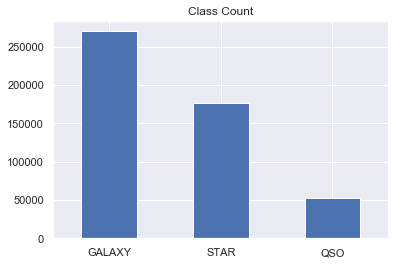

In [24]:
target_count.plot(kind='bar', title='Class Count', rot=0) 

In [16]:
df.pivot_table(index='field', columns='class', values='redshift', aggfunc=np.sum)

class,GALAXY,QSO,STAR
field,,,
11,31.793872,97.988696,-0.033573
12,30.579301,66.733009,-0.018010
13,31.947360,119.434032,-0.031206
14,29.251750,116.510846,-0.016696
15,27.106677,93.613915,-0.033338
...,...,...,...
844,0.070984,1.021320,-0.000050
845,0.313154,NaN,-0.000233
929,NaN,NaN,-0.000040


In [20]:
df.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class        
GALAXY False              139
       True            269914
QSO    True             53062
STAR   False           113411
       True             63474

In [18]:
df['redshift_class'] = df['redshift'].apply(lambda x: True if x>=0 else False)

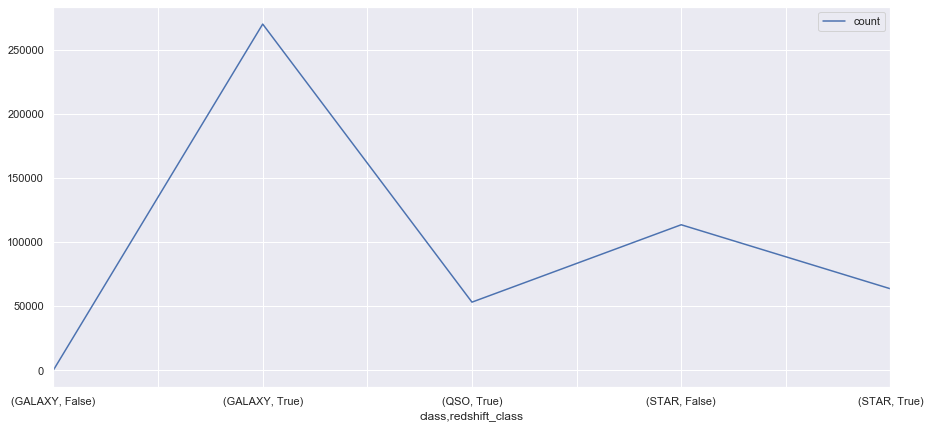

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

In [27]:
whos

Variable                 Type           Data/Info
-------------------------------------------------
BernoulliNB              ABCMeta        <class 'sklearn.naive_bayes.BernoulliNB'>
DecisionTreeClassifier   ABCMeta        <class 'sklearn.tree.tree<...>.DecisionTreeClassifier'>
GaussianNB               ABCMeta        <class 'sklearn.naive_bayes.GaussianNB'>
GridSearchCV             ABCMeta        <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
Image                    type           <class 'IPython.core.display.Image'>
KNeighborsClassifier     ABCMeta        <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression       type           <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MinMaxScaler             type           <class 'sklearn.preprocessing.data.MinMaxScaler'>
Normalizer               type           <class 'sklearn.preprocessing.data.Normalizer'>
RandomForestClassifier   ABCMeta        <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
Ra

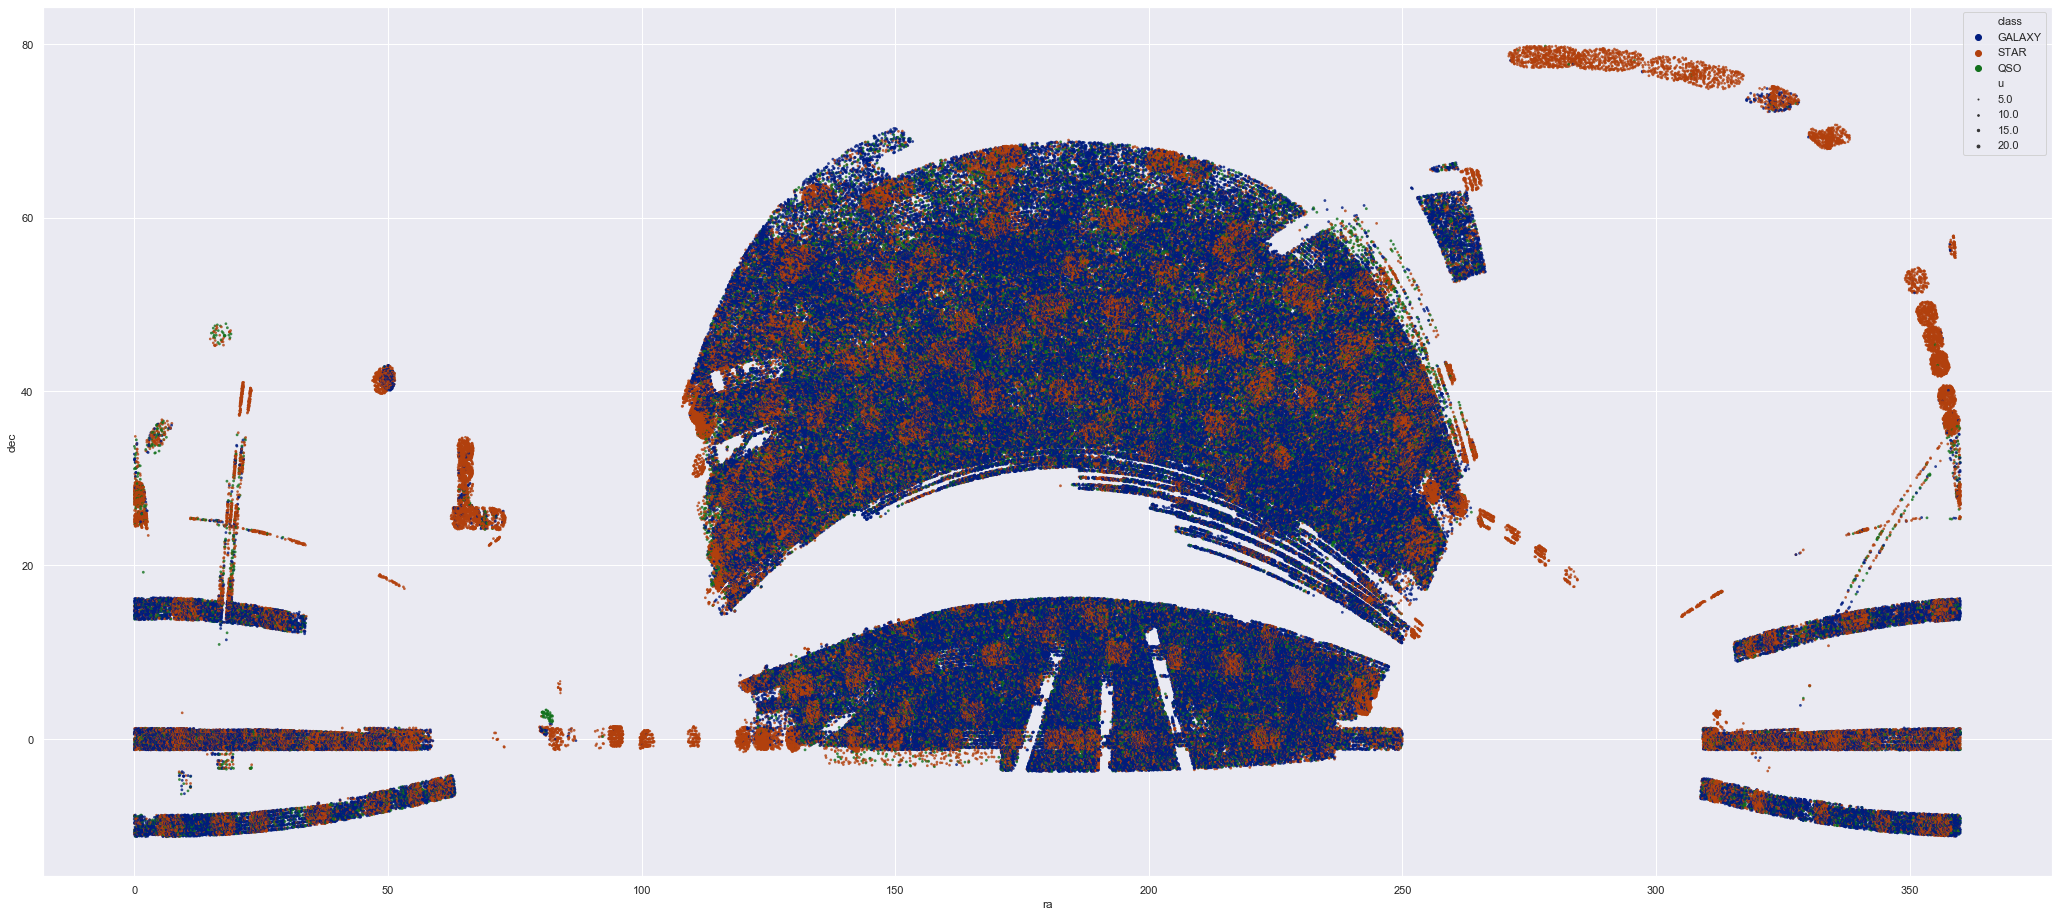

In [132]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=df)

<Figure size 1080x504 with 0 Axes>

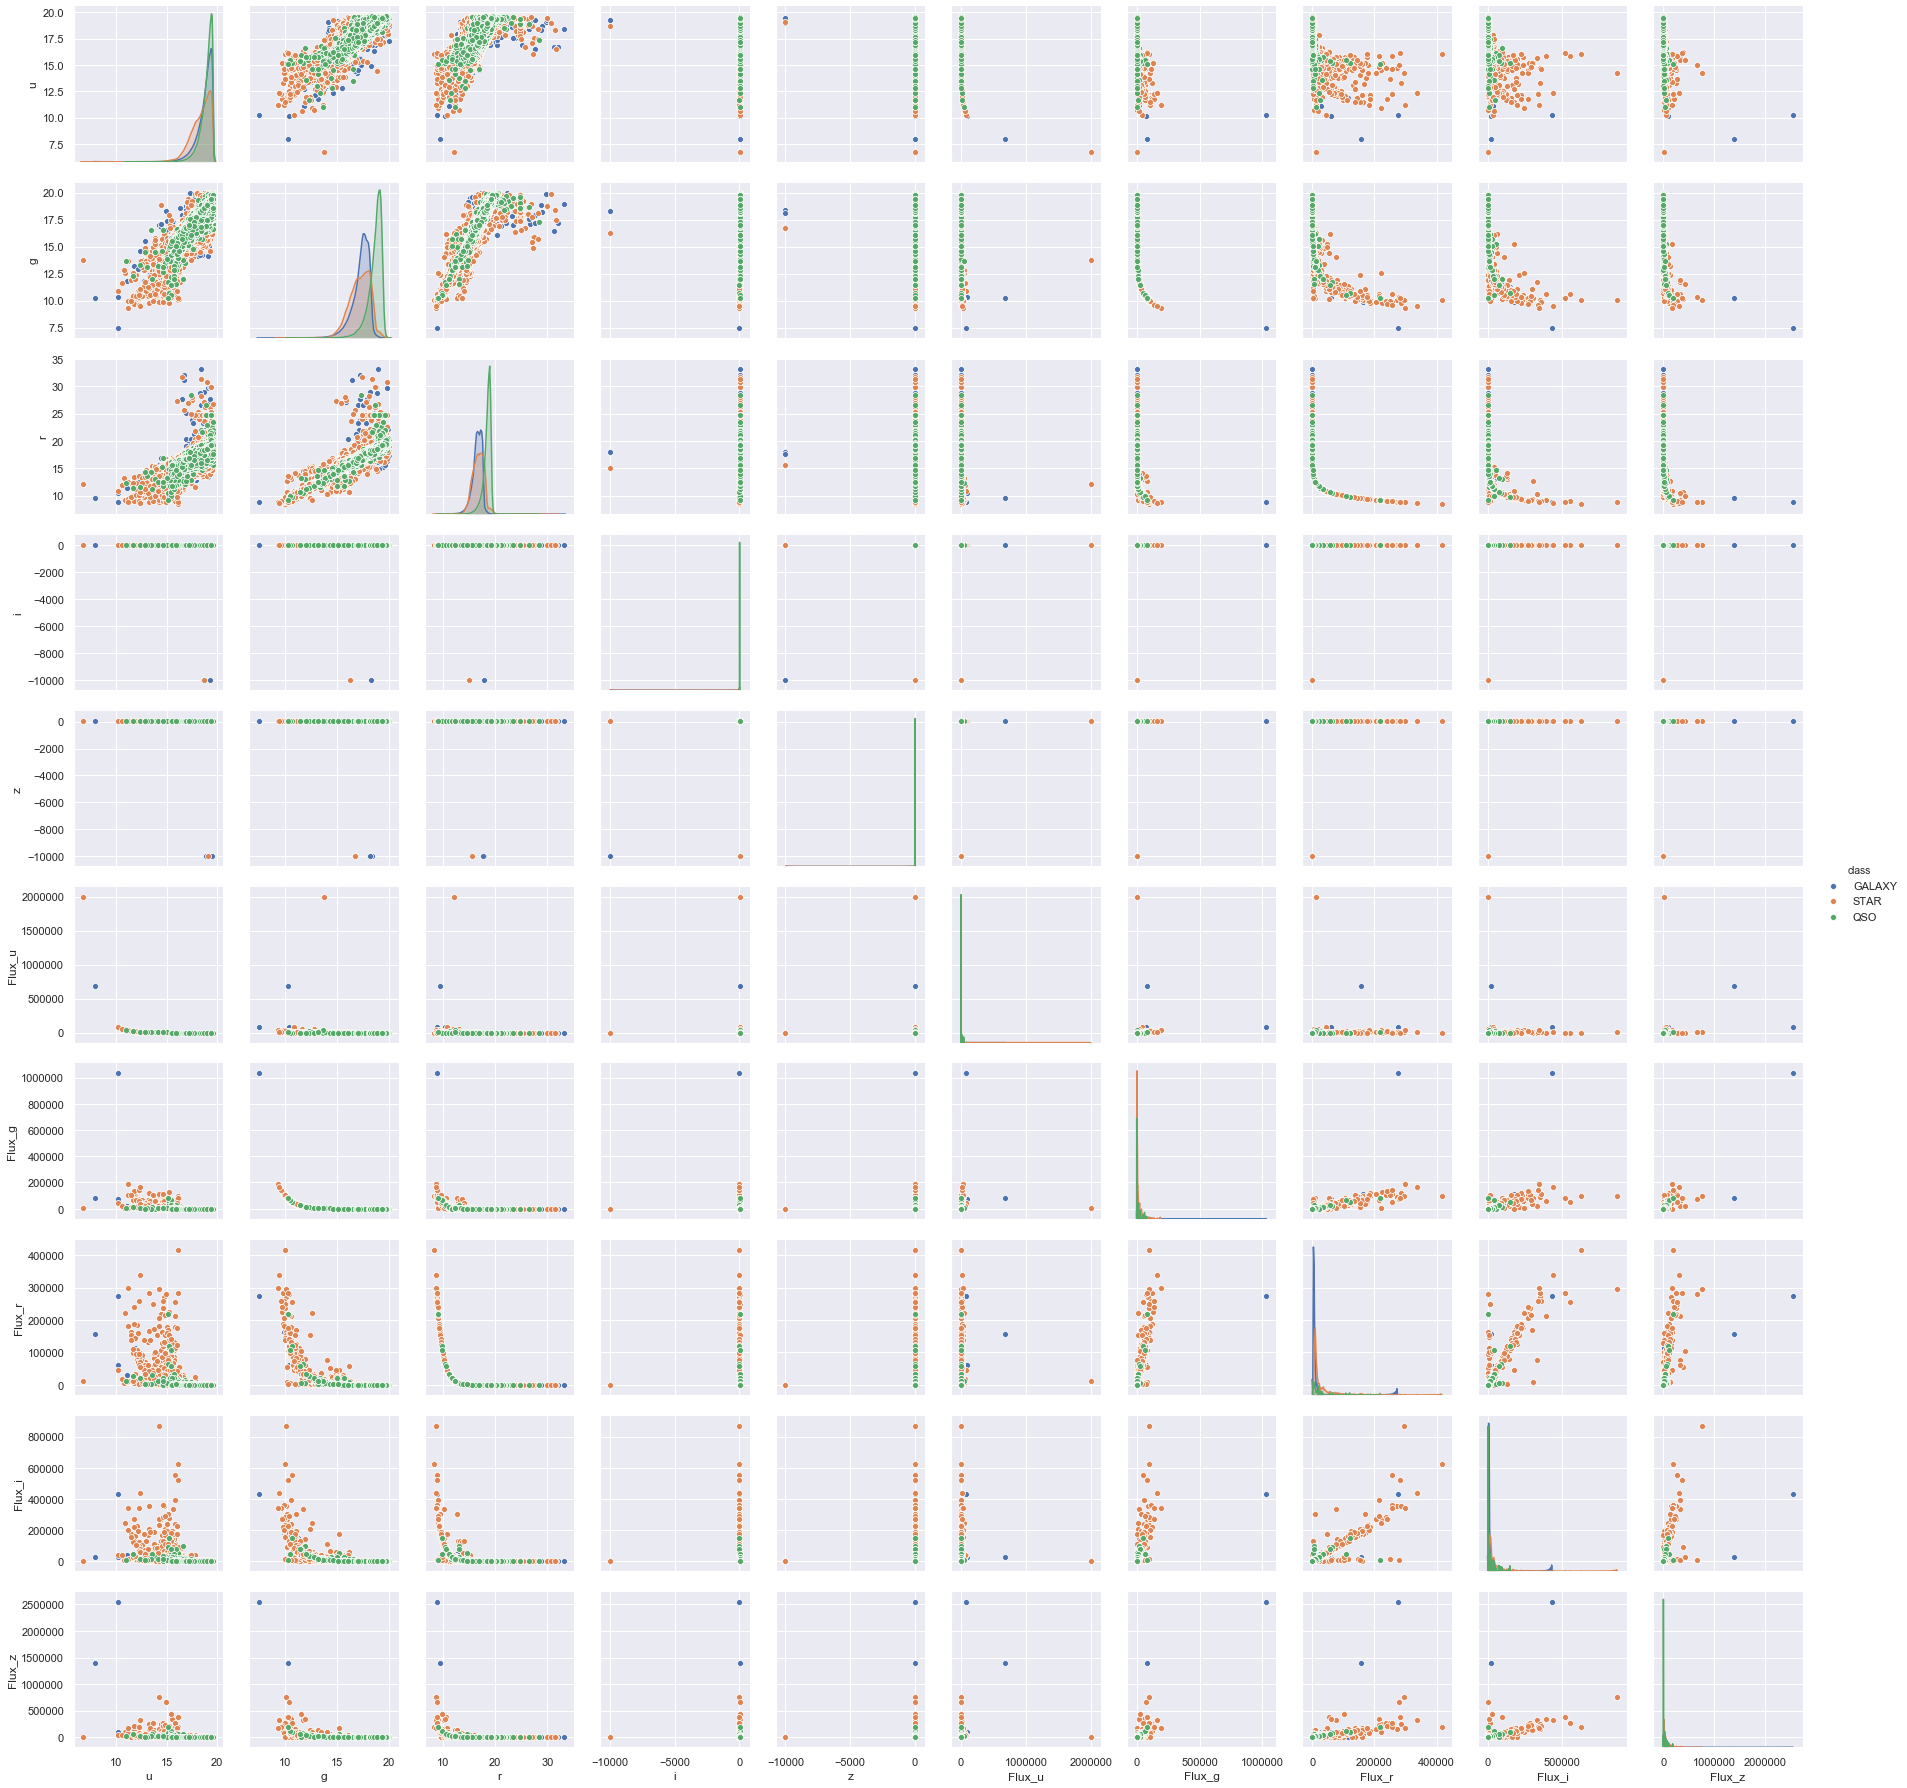

In [141]:
plt.figure(figsize = (15,7))
sns.pairplot(df[['class', 'u', 'g', 'r', 'i', 'z', 'Flux_u', 'Flux_g', 'Flux_r', 'Flux_i', 'Flux_z']], hue='class')

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in doubl

<Figure size 1080x504 with 0 Axes>

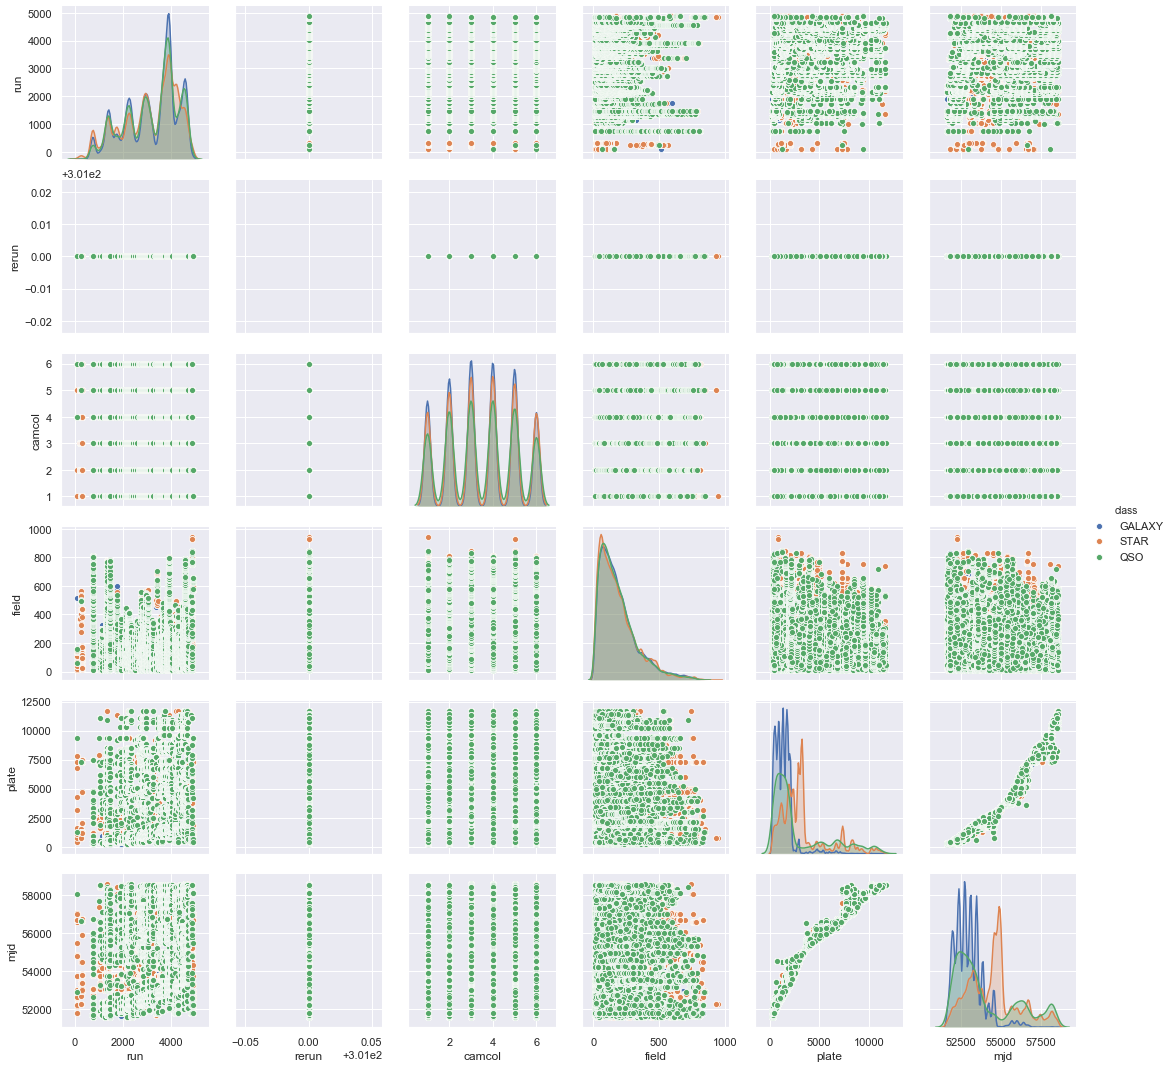

In [30]:
plt.figure(figsize = (15,7))
sns.pairplot(df[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

# Part 3: Feature Engineering

In [21]:
# limiting outlier values
df[['i','z']] = df[['i','z']].clip(5,33)

In [22]:
# Colour Indexes-difference between the two spectrum range
df['color_u_g'] = df['u'] - df['g']
df['color_g_r'] = df['g'] - df['r']
df['color_r_i'] = df['r'] - df['i']
df['color_i_z'] = df['i'] - df['z']

In [23]:
df[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

,u,g,r,i,z,color_u_g,color_g_r,color_r_i,color_i_z
objid,,,,,,,,,
1237645879551066262,19.38905,18.24496,17.58728,17.20807,16.90905,1.14409,0.65768,0.37921,0.29902
1237645879578460255,19.52808,17.96541,17.03493,16.53754,16.14154,1.56267,0.93048,0.49739,0.39600
1237645879578460271,18.72268,17.38520,16.81134,16.51803,16.29502,1.33748,0.57386,0.29331,0.22301
1237645941291614227,17.65612,16.17133,15.58940,15.37850,15.26744,1.48479,0.58193,0.21090,0.11106
1237645941824356443,17.54884,15.75164,15.03100,14.66728,14.36099,1.79720,0.72064,0.36372,0.30629


In [24]:
# I do some conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = df.iloc[:, 11:16]
for i in cols:
    df[i] = df[i] * 3.631*(10**-6) #nanomaggie to Jansky

df.iloc[:, 11:16].describe()

,Flux_u,Flux_g,Flux_r,Flux_i,Flux_z
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.000225,0.000760,0.001366,0.001795,0.002073
std,0.010871,0.007129,0.009912,0.013366,0.018467
min,0.000052,0.000036,-0.001005,-0.001024,-0.004337
25%,0.000071,0.000217,0.000336,0.000421,0.000468
50%,0.000102,0.000353,0.000622,0.000816,0.000959
75%,0.000186,0.000653,0.001193,0.001616,0.002021
max,7.228239,3.743067,1.514870,3.156607,9.242554


In [29]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'Flux_u', 'Flux_g', 'Flux_r', 'Flux_i', 'Flux_z', 'class', 'redshift',
       'plate', 'mjd', 'redshift_class', 'color_u_g', 'color_g_r', 'color_r_i',
       'color_i_z'],
      dtype='object')

In [25]:
# log transformation to decrease the effect of the outliers
df['logRedshift'] = (df['redshift']+1).transform(np.log)

In [27]:
# Encode target
# pd.factorize(df1['class'])
objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
df['class'] = df['class'].map(objects)

In [28]:
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,Flux_z,class,redshift,plate,mjd,color_u_g,color_g_r,color_r_i,color_i_z,logRedshift
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,184.363520,26.933661,18.641889,17.416079,16.891070,16.633139,16.474387,3162.488388,301.0,3.493192,...,0.002073,0.752354,0.172106,2226.766806,53622.502072,1.225809,0.525009,0.257931,0.158751,0.119516
std,69.856729,20.931893,0.829246,0.984866,1.132105,1.210610,1.284590,1091.916619,0.0,1.594965,...,0.018467,0.631321,0.432988,2057.366910,1479.651840,0.527699,0.339950,0.267065,0.282798,0.245465
min,0.002795,-11.252825,6.752484,7.466997,8.449127,5.000000,5.000000,94.000000,301.0,1.000000,...,-0.004337,0.000000,-0.004268,266.000000,51578.000000,-6.963016,-14.784580,-15.859360,-16.641130,-0.004277
25%,146.089773,7.118793,18.224068,16.863250,16.208758,15.878700,15.636057,2305.000000,301.0,2.000000,...,0.000468,0.000000,0.000035,951.000000,52553.000000,0.975260,0.325010,0.146230,0.050710,0.000035
50%,186.178455,29.598937,18.873555,17.530735,16.915755,16.620300,16.445770,3530.000000,301.0,4.000000,...,0.000959,1.000000,0.050838,1672.000000,53227.000000,1.233940,0.535995,0.286150,0.158060,0.049588
75%,225.357045,43.802991,19.271060,18.060080,17.585013,17.338410,17.225373,3927.000000,301.0,5.000000,...,0.002021,1.000000,0.097688,2558.000000,54509.000000,1.572320,0.763133,0.398940,0.283000,0.093206
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4874.000000,301.0,6.000000,...,9.242554,2.000000,7.011245,11704.000000,58543.000000,6.060500,5.553990,14.287080,16.548340,2.080846


In [29]:
# Reorder columns
df=df[['class', 'u', 'g', 'r', 'i', 'z',
        'Flux_u', 'Flux_g', 'Flux_r', 'Flux_i', 'Flux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
df.head()

,class,u,g,r,i,z,Flux_u,Flux_g,Flux_r,Flux_i,...,logRedshift,ra,dec,redshift,redshift_class,rerun,camcol,field,plate,mjd
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,1,19.38905,18.24496,17.58728,17.20807,16.90905,0.000064,0.000183,0.000335,0.000475,...,0.031619,348.902530,1.271886,0.032125,True,301,6,94,382,51816
1237645879578460255,1,19.52808,17.96541,17.03493,16.53754,16.14154,0.000056,0.000237,0.000557,0.000881,...,0.114502,51.443695,1.270073,0.121315,True,301,6,512,414,51869
1237645879578460271,1,18.72268,17.38520,16.81134,16.51803,16.29502,0.000118,0.000404,0.000685,0.000897,...,0.047613,51.483584,1.272013,0.048765,True,301,6,512,414,51869
1237645941291614227,0,17.65612,16.17133,15.58940,15.37850,15.26744,0.000314,0.001235,0.002110,0.002562,...,-0.000098,49.627485,-1.041769,-0.000098,False,301,1,100,1515,52932
1237645941824356443,1,17.54884,15.75164,15.03100,14.66728,14.36099,0.000347,0.001817,0.003529,0.004933,...,0.039496,40.285690,-0.714957,0.040287,True,301,2,37,408,51821


In [30]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
X_tr, X_holdout, y_tr, y_holdout = train_test_split(df.iloc[:, 1:18], df.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of my train set

(300000, 17)

In [114]:
# list to contain model and accuracy values
evaluation_list = []
# to contain model names
models = []

# Part 4: ML Models

## 1.KNN

In [115]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

knn_acc=round(knn.score(X_train, y_train)*100, 2)
knn_acc_test = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Train Accuracy Score of Basic KNN model: % {knn_acc}')
print(f'Test Accuracy Score of Basic KNN model: % {knn_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision Score : {precision}')
print(f'Recall Score : {recall}')
print(f'F1-score Score : {f1score}')

Train Accuracy Score of Basic KNN model: % 88.8
Test Accuracy Score of Basic KNN model: % 83.46
Precision Score : 0.8435010295042358
Recall Score : 0.8222349700278944
F1-score Score : 0.8322660073338389


In [116]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'KNN'),
    ('Train Accuracy', round(knn_acc, 2)),
    ('Test Accuracy', round(knn_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## 2. Logistic Regression

In [118]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
# Get probabilities
#pred_proba = log_reg.predict_proba(X_test)

lr_acc=round(log_reg.score(X_train, y_train) * 100, 2)
lr_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Basic Logistic Reg.: % {lr_acc}')
print(f'Test Accuracy Score of Basic Logistic Reg.: % {lr_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Basic Logistic Reg.: % 95.17
Test Accuracy Score of Basic Logistic Reg.: % 95.08
Precision : 0.955732803099785
Recall    : 0.9393183498511991
F1-score   : 0.9468700365236606


In [119]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(lr_acc, 2)),
    ('Test Accuracy', round(lr_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## 3. Naive Bayes

### 3.1. Gaussian Naive Bayes

In [120]:
nb_g=GaussianNB()
nb_g.fit(X_train, y_train)
y_pred = nb_g.predict(X_test)

nbg_acc=round(nb_g.score(X_train, y_train) * 100, 2)
nbg_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of GaussianNB: % 85.29
Test Accuracy Score of GaussianNB: % 85.29
Precision : 0.8206969568860015
Recall    : 0.855242218200175
F1-score   : 0.8157562269712768


In [121]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'GaussianNB'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### 3.2. Bernoulli Naive Bayes

In [122]:
nb_b=BernoulliNB()
nb_b.fit(X_train, y_train)
y_pred = nb_b.predict(X_test)

nbb_acc=round(nb_b.score(X_train, y_train) * 100, 2)
nbb_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of BernoulliNB: % {nbb_acc}')
print(f'Test Accuracy Score of BernoulliNB: % {nbb_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of BernoulliNB: % 80.96
Test Accuracy Score of BernoulliNB: % 81.14
Precision : 0.7862720900648572
Recall    : 0.7192500547427446
F1-score   : 0.7384174924913557


In [123]:
evaluation_list.append(dict([
    ('Model', 'BernoulliNB'),
    ('Train Accuracy', round(nbb_acc, 2)),
    ('Test Accuracy', round(nbb_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## 4. Linear SVC 

In [124]:
linear_svc = LinearSVC()
y_pred = linear_svc.fit(X_train, y_train).predict(X_test)

linear_svc_acc = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Train Accuracy Score of SVC model: % {linear_svc_acc}')
print(f'Test Accuracy Score of SVC model: % {linear_svc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of SVC model: % 92.67
Test Accuracy Score of SVC model: % 92.51
Precision : 0.9329328332643586
Recall    : 0.9277781669695563
F1-score   : 0.9276843823473951


In [125]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear SVC'),
    ('Train Accuracy', round(linear_svc_acc, 2)),
    ('Test Accuracy', round(linear_svc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## 5. Decision Trees

In [126]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

dt_acc = round(dtree.score(X_train, y_train) * 100, 2)
dt_acc_test = round(accuracy_score(y_test, y_pred) *100 ,2)

print(f'Train Accuracy Score of Decision Tree: % {dt_acc}')
print(f'Test Accuracy Score of Decision Tree: % {dt_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Decision Tree: % 100.0
Test Accuracy Score of Decision Tree: % 99.01
Precision : 0.983253470905713
Recall    : 0.9830138355684922
F1-score   : 0.9831335423071156


In [127]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Decision Tree'),
    ('Train Accuracy', round(dt_acc, 2)),
    ('Test Accuracy', round(dt_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [35]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

,importance
feature,
logRedshift,0.960133
color_u_g,0.013188
color_g_r,0.008867
color_r_i,0.005861
color_i_z,0.002490
dec,0.001758
ra,0.001399
Flux_z,0.000938
Flux_u,0.000763


## 6. Ensemble Methods

## 6.1. Bagging Algorithms

### 6.1.1. Bagging Classifier

In [128]:
# Bagged Decision Trees
num_estimator = 100
seed = 7
bag = BaggingClassifier(base_estimator=dtree, n_estimators=num_estimator,
    bootstrap=True, n_jobs=-1, random_state=seed)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bag_acc = round(bag.score(X_train, y_train) * 100, 2)
bag_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Bagged Decision Trees: % {bag_acc}')
print(f'Test Accuracy Score of Bagged Decision Trees: % {bag_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Bagged Decision Trees: % 100.0
Test Accuracy Score of Bagged Decision Trees: % 99.38
Precision : 0.991951876406859
Recall    : 0.9865375792305177
F1-score   : 0.9892072785904512


In [129]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Bagging Classifier'),
    ('Train Accuracy', round(bag_acc, 2)),
    ('Test Accuracy', round(bag_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### 6.1.2. Random Forest

In [130]:
rforest = RandomForestClassifier(n_estimators = num_estimator)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

rf_acc = round(rforest.score(X_train, y_train) * 100, 2)
rf_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Random Forest: % {rf_acc}')
print(f'Test Accuracy Score of Random Forest: % {rf_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Random Forest: % 100.0
Test Accuracy Score of Random Forest: % 99.34
Precision : 0.9917497834501515
Recall    : 0.9861835424679747
F1-score   : 0.9889254379349127


In [131]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Random Forest'),
    ('Train Accuracy', round(rf_acc, 2)),
    ('Test Accuracy', round(rf_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [132]:
# View feature importances
importances_rf = pd.DataFrame({'feature': X_train.columns,
                             'importance': rforest.feature_importances_})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(17)

,importance
feature,
logRedshift,0.478467
color_r_i,0.136281
color_i_z,0.100172
color_u_g,0.085075
color_g_r,0.041605
z,0.030391
i,0.024320
Flux_z,0.020663
r,0.019215


### 6.1.3. Extra Trees Classifier

In [133]:
etc = ExtraTreesClassifier(n_estimators=num_estimator)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

etc_acc = round(etc.score(X_train, y_train) * 100, 2)
etc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Extra Trees: % {etc_acc}')
print(f'Test Accuracy Score of Extra Trees: % {etc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Extra Trees: % 100.0
Test Accuracy Score of Extra Trees: % 99.03
Precision : 0.9891066885842367
Recall    : 0.9832045702944919
F1-score   : 0.9860944817603259


In [134]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Extra Trees'),
    ('Train Accuracy', round(etc_acc, 2)),
    ('Test Accuracy', round(etc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [135]:
# View feature importances
importances_etc = pd.DataFrame({'feature': X_train.columns,
                             'importance': etc.feature_importances_})
importances_etc = importances_etc.sort_values('importance',ascending=False).set_index('feature')
importances_etc.head(17)

,importance
feature,
logRedshift,0.456411
color_u_g,0.079049
color_r_i,0.055191
color_i_z,0.047747
z,0.044131
g,0.041550
Flux_z,0.040664
color_g_r,0.034347
r,0.029824


## 6.2. Boosting Algorithms

### 6.2.1. AdaBoost Classifier 

In [137]:
abc = AdaBoostClassifier(base_estimator=dtree, n_estimators=num_estimator, random_state = seed)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

abc_acc = round(abc.score(X_train, y_train) *100 , 2)
abc_acc_test = round(accuracy_score(y_test, y_pred) * 100 ,2)

print(f'Train Accuracy Score of AdaBoostClassifier: % {abc_acc}')
print(f'Test Accuracy Score of AdaBoostClassifier: % {abc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of AdaBoostClassifier: % 100.0
Test Accuracy Score of AdaBoostClassifier: % 99.02
Precision : 0.9833772218702883
Recall    : 0.9831628058527372
F1-score   : 0.9832699598602863


In [138]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'AdaBoost'),
    ('Train Accuracy', round(abc_acc, 2)),
    ('Test Accuracy', round(abc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### 6.2.2. Stochastic Gradient Boosting Classification

In [139]:
gbc = GradientBoostingClassifier(n_estimators=num_estimator, learning_rate=0.01, random_state=seed)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_acc = round(gbc.score(X_train, y_train) * 100, 2)
gbc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GradientBoostingClassifier: % {gbc_acc}')
print(f'Test Accuracy Score of GradientBoostingClassifier: % {gbc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of GradientBoostingClassifier: % 98.72
Test Accuracy Score of GradientBoostingClassifier: % 98.7
Precision : 0.9865251172606814
Recall    : 0.9739816063508385
F1-score   : 0.9800211842309574


In [140]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'GradientBoosting'),
    ('Train Accuracy', round(gbc_acc, 2)),
    ('Test Accuracy', round(gbc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## 6.3. Voting Algorithms

## 6.3.1. Soft Voting 

In [141]:
# Soft Voting
vc = VotingClassifier(
    estimators=[('lr', log_reg), ('nb',nb_g), ('rf', rforest), ('gbc', gbc)],
    voting = 'soft')

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

vc_acc = round(vc.score(X_train, y_train) * 100, 2)
vc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Soft VotingClassifier: % {vc_acc}')
print(f'Test Accuracy Score of Soft VotingClassifier: % {vc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Soft VotingClassifier: % 98.9
Test Accuracy Score of Soft VotingClassifier: % 98.7
Precision : 0.984190369309836
Recall    : 0.9768712634956542
F1-score   : 0.9804392668454692


In [142]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Soft VotingClassifier'),
    ('Train Accuracy', round(vc_acc, 2)),
    ('Test Accuracy', round(vc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### 6.3.2. Hard Voting 

In [143]:
# Hard Voting
vc_hard = VotingClassifier(
    estimators=[('lr', log_reg), ('nb',nb_g), ('rf', rforest), ('gbc', gbc)],
    voting = 'hard')

vc_hard.fit(X_train, y_train)
y_pred = vc_hard.predict(X_test)

vch_acc = round(vc_hard.score(X_train, y_train) * 100, 2)
vch_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Hard VotingClassifier: % {vch_acc}')
print(f'Test Accuracy Score of Hard VotingClassifier: % {vch_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Hard VotingClassifier: % 98.73
Test Accuracy Score of Hard VotingClassifier: % 98.63
Precision : 0.9863959057595487
Recall    : 0.9730884402638194
F1-score   : 0.979456196205264


In [144]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Hard VotingClassifier'),
    ('Train Accuracy', round(vch_acc, 2)),
    ('Test Accuracy', round(vch_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

# Part 5: Evaluation 

### Performance list of models

In [146]:
model_results = pd.DataFrame(data=evaluation_list)
model_results = model_results[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
#model_perf.drop_duplicates(inplace=True)
model_results = model_results.sort_values(by='Test Accuracy', ascending=False)
model_results = model_results.set_index('Model')
model_results

,Train Accuracy,Test Accuracy,Precision,Recall,F1
Model,,,,,
Bagging Classifier,100.00,99.38,0.99,0.99,0.99
Random Forest,100.00,99.34,0.99,0.99,0.99
Extra Trees,100.00,99.03,0.99,0.98,0.99
AdaBoost,100.00,99.02,0.98,0.98,0.98
Decision Tree,100.00,99.01,0.98,0.98,0.98
GradientBoosting,98.72,98.70,0.99,0.97,0.98
Soft VotingClassifier,98.90,98.70,0.98,0.98,0.98
Hard VotingClassifier,98.73,98.63,0.99,0.97,0.98
Logistic Regression,95.17,95.08,0.96,0.94,0.95


### Optimization of the Model 

In [38]:
n_est = [80, 100, 120, 140]
max_features_opt = [0.93, 0.95, 0.97]

In [39]:
param_grid = dict(n_estimators = n_est, max_features=max_features_opt)

In [40]:
# GridSearchCV on the best model to make it more robust
kf=KFold(n_splits=10, shuffle=True, random_state=76)
bag_grid = GridSearchCV(bag, param_grid, cv = kf, scoring='accuracy', n_jobs=-1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=76, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples

In [42]:
# examine the best model
print(bag_grid.best_score_)
print(bag_grid.best_params_)
print(bag_grid.best_estimator_)

0.99427
{'max_features': 0.93, 'n_estimators': 120}
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                          

In [45]:
# Optimized Model
bag_opt = BaggingClassifier(base_estimator=dtree, n_estimators=120, max_features=0.93, 
                            bootstrap=True, random_state=seed, n_jobs = -1)

bag_opt_acc = round(cross_val_score(bag_opt, X_train, y_train, cv=kf).mean())
bag_opt_std = round(cross_val_score(bag_opt, X_train, y_train, cv=kf).std())


print(f'Train Accuracy Score of Optimized Bagged Decision Trees: {bag_opt_acc} +/- {bag_opt_std}\n')

precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Train Accuracy Score of Optimized Bagged Decision Trees: % 0.99 +/- 0.0

Precision : 0.991951876406859
Recall    : 0.9865375792305177
F1-score   : 0.9892072785904512


### Confusion Matrix 

In [48]:
bag_opt.fit(X_train, y_train)
y_pred=bag_opt.predict(X_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

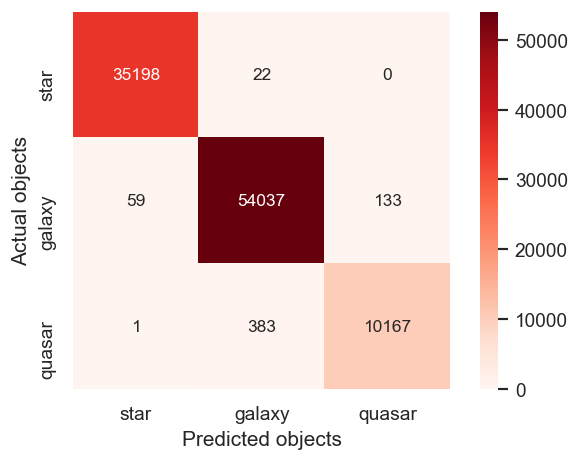

In [89]:
# Print confusion matrix for Optimized Bagging Classifier 


bag_confusion = confusion_matrix(y_test,y_pred)
plt.figure(dpi=125)
sns.heatmap(bag_confusion, cmap=plt.cm.Reds, annot=True, square=True,fmt='d',
           xticklabels=['star', 'galaxy', 'quasar'],
           yticklabels=['star', 'galaxy', 'quasar'])

plt.xlabel('Predicted objects')
plt.ylabel('Actual objects');


#plt.savefig("confusion_matrix_logit_iris")

# Part 6: Holdout Test

In [86]:
print('Best model to test with Holdout set:')
print('Bagged Decision Tree - Optimized via GridSearchCV')

Best model to test with Holdout set:
Bagged Decision Tree - Optimized via GridSearchCV


In [88]:
# Get predictions and probabilities
holdout_preds = bag_opt.predict(X_holdout)
holdout_y_score = bag_opt.predict_proba(X_holdout)

# Use X_holdout, y_holdout to calculate accuracy
holdout_acc = round(accuracy_score(y_holdout, holdout_preds) * 100, 2)
print(f'Accuracy of Bagged Decision Tree on holdout: % {holdout_acc}')

Accuracy of Bagged Decision Tree on holdout: % 99.44
